This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
1.	Read the column description and ensure you understand each attribute well
2.	Study the data distribution in each attribute, share your findings(5 points)
3.	Get the target column distribution. Your comments
4.	Split the data into training and test set in the ratio of 70:30 respectively
5.	Use different classification models (Logistic, Linear) to predict the likelihood of a liability customer buying personal loans.(15 
        points)
6.	Print the confusion matrix for all the above models.(5 points)
 7.   Give your reasoning on which is the best model in this case and why it performs better?(5 points)

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

In [5]:
data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [6]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
data.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

In [8]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [9]:
data.shape

(5000, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [11]:
data.nunique()

Age                    45
Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [12]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
variable_name = data.columns.tolist()
variable_name

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

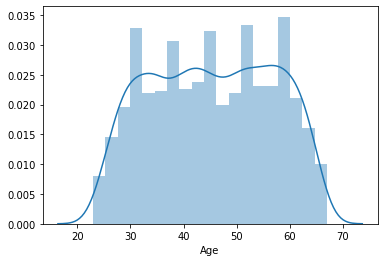

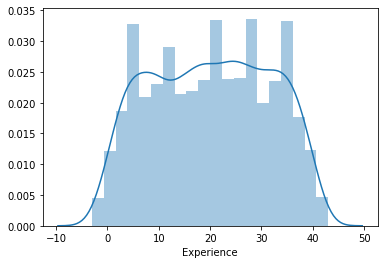

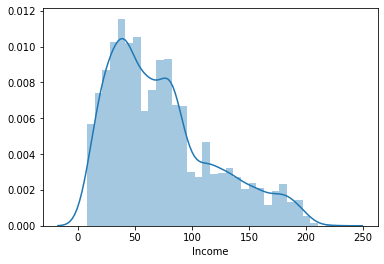

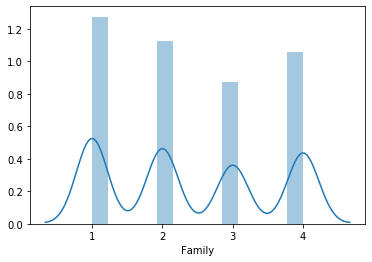

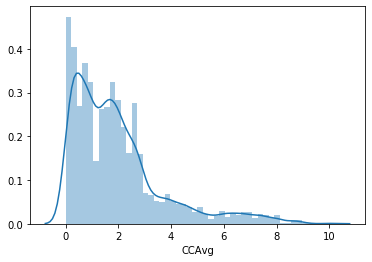

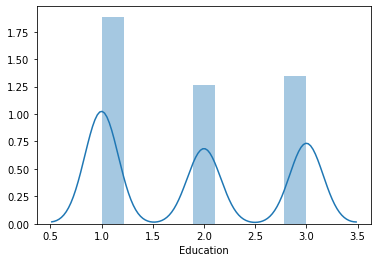

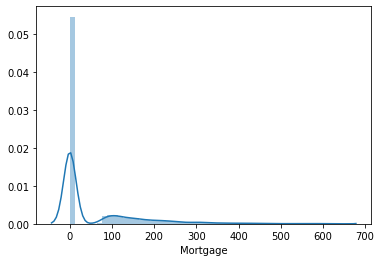

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

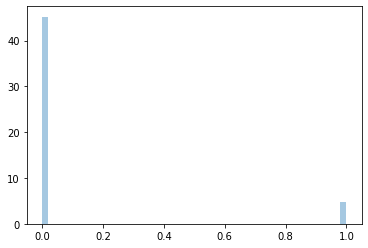

In [14]:
for var in variable_name:
    sns.distplot(data[var])
    plt.show()

In [15]:
y = data['Personal Loan']

In [16]:
x = data.iloc[:,data.columns!='Personal Loan']

In [17]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [19]:
variable_name = x.columns.tolist()
variable_name

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

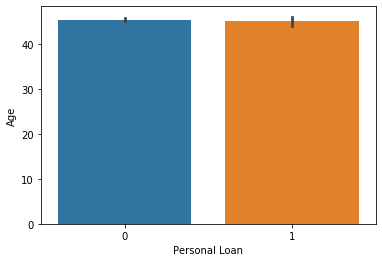

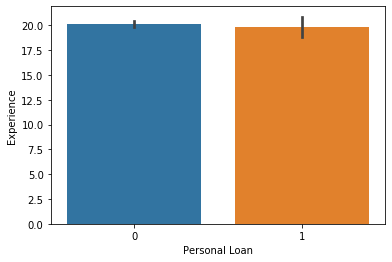

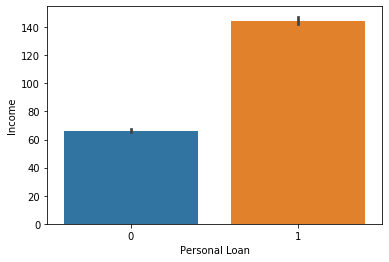

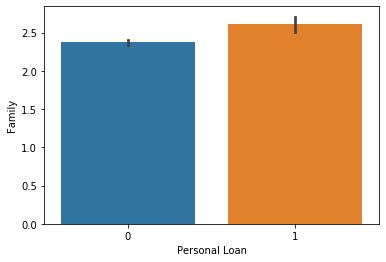

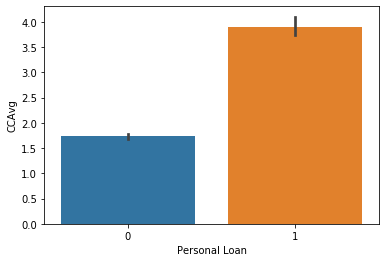

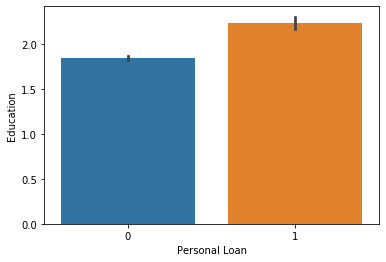

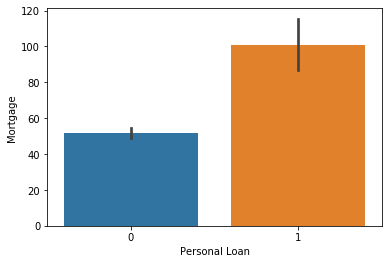

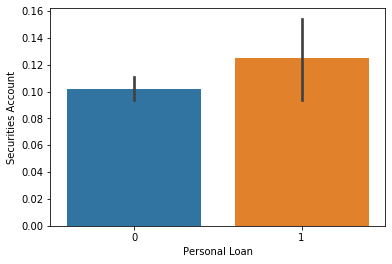

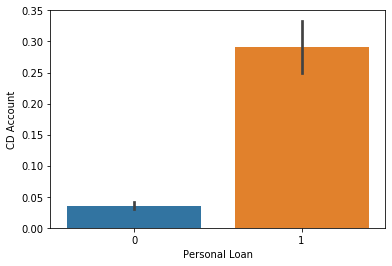

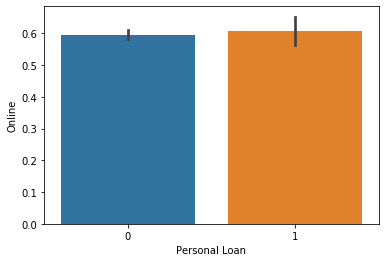

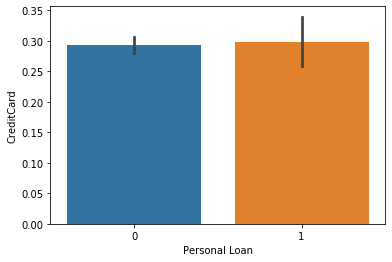

In [20]:
for var in variable_name:
    sns.barplot(y, x[var])
    plt.show()

Observation 
ZipCode is not important parameter here

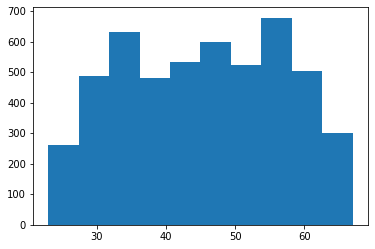

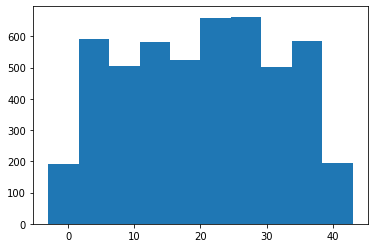

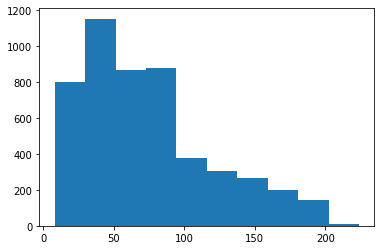

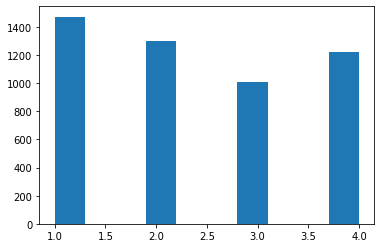

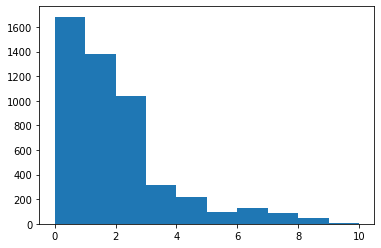

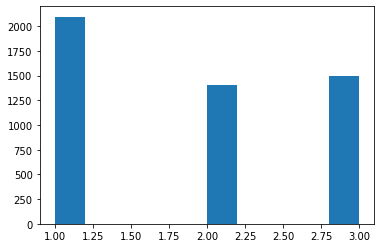

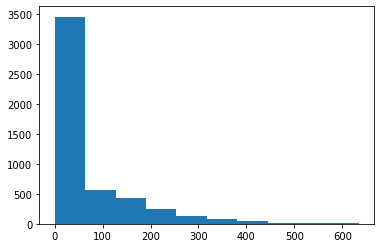

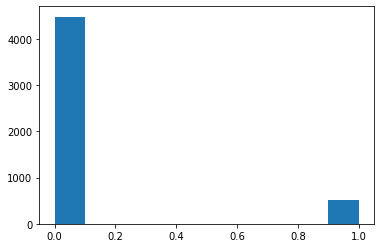

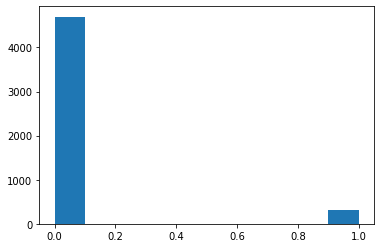

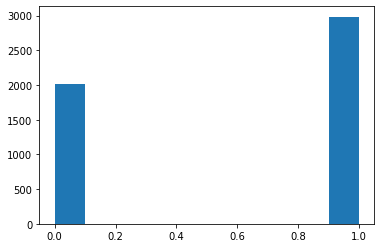

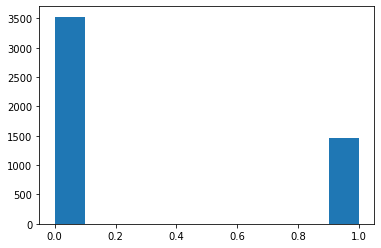

In [21]:
for var in variable_name:
    plt.hist(x[var])
    plt.show()

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 123)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 11)
(1500, 11)
(3500,)
(1500,)


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logistic_model = LogisticRegression()

In [39]:
logistic_model.fit(x_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_train_pred = logistic_model.predict(x_train)

In [41]:
y_test_pred = logistic_model.predict(x_test)

In [42]:
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[3117   49]
 [ 141  193]]
[[1343   11]
 [  50   96]]


In [43]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9457142857142857
0.9593333333333334


In [44]:
from sklearn.tree import DecisionTreeClassifier


C:\Users\DELL\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\DELL\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [45]:
decision_tree_model = DecisionTreeClassifier()

In [46]:
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
y_train_pred = decision_tree_model.predict(x_train)

In [48]:
y_test_pred = decision_tree_model.predict(x_test)

In [49]:
confusion_matrix(y_true=y_train, y_pred=y_train_pred)

array([[3166,    0],
       [   0,  334]], dtype=int64)

In [50]:
confusion_matrix(y_true=y_test, y_pred=y_test_pred)

array([[1337,   17],
       [  15,  131]], dtype=int64)

In [51]:
print(accuracy_score(y_true=y_train, y_pred=y_train_pred))
print(accuracy_score(y_true=y_test, y_pred=y_test_pred))

1.0
0.9786666666666667


In [52]:
decision_tree_model.get_depth()

11

In [53]:
print(recall_score(y_true=y_train, y_pred=y_train_pred))
print(recall_score(y_true=y_test, y_pred=y_test_pred))

1.0
0.8972602739726028


In [54]:
importances = decision_tree_model.feature_importances_
importances

array([0.01603274, 0.01634083, 0.31269838, 0.15874693, 0.05683879,
       0.40922043, 0.00805864, 0.        , 0.01691458, 0.00514868,
       0.        ])

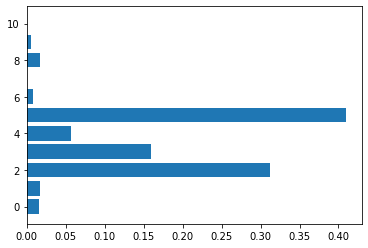

In [55]:
plt.barh(range(len(importances)), importances)
plt.show()

In [56]:
sorted_indedices = np.argsort(importances)
features = list(x_train.columns)
features

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

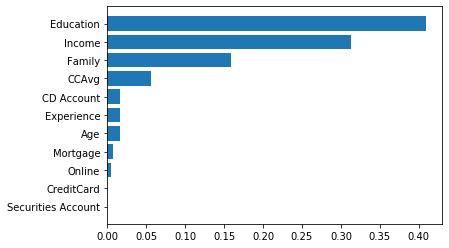

In [57]:
plt.barh(range(len(importances)), importances[sorted_indedices])
plt.yticks(range(len(importances)), [features[i] for i in sorted_indedices])
plt.show()

The only importance feature in the model is Education, income, family, CCAVG,
the other parameters such as Age CD Account, Experience show much less importance 
remaining parameter are very less important

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {
    "criterion" : ["gini", "entropy"], 
    "max_depth" : [None, 15, 20],
    "min_samples_split" : [2, 20, 30]
}

In [60]:
gridSearch_object = GridSearchCV(decision_tree_model, param_grid = param_grid, verbose=15, n_jobs=-1, cv=5) 

In [61]:
gridSearch_object.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [62]:
pd.DataFrame(gridSearch_object.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012469,0.001786,0.002594,0.000797,gini,None,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.981429,0.981429,0.978571,0.980000,0.977143,0.979714,0.001666,18
1,0.012771,0.002724,0.002594,0.000798,gini,None,20,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.982857,0.981429,0.981429,0.982857,0.978571,0.981429,0.001565,14
2,0.012766,0.002034,0.002992,0.000631,gini,None,30,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.982857,0.982857,0.981429,0.987143,0.982857,0.983429,0.001938,1
3,0.017459,0.009043,0.002590,0.000790,gini,15,2,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.980000,0.987143,0.981429,0.982857,0.977143,0.981714,0.003307,13
4,0.011973,0.002541,0.002793,0.000747,gini,15,20,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.982857,0.981429,0.981429,0.982857,0.978571,0.981429,0.001565,14


In [63]:
gridSearch_object.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 30}

In [64]:
gridSearch_object.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
y_train_pred = gridSearch_object.predict(x_train)
y_test_pred = gridSearch_object.predict(x_test)

In [66]:
confusion_matrix(y_true=y_train, y_pred=y_train_pred)

array([[3144,   22],
       [  21,  313]], dtype=int64)

In [67]:
confusion_matrix(y_true=y_test, y_pred=y_test_pred)

array([[1339,   15],
       [  10,  136]], dtype=int64)

In [68]:
print(accuracy_score(y_true=y_train, y_pred=y_train_pred))
print(accuracy_score(y_true=y_test, y_pred=y_test_pred))

0.9877142857142858
0.9833333333333333


In [69]:
print(recall_score(y_true=y_train, y_pred=y_train_pred))
print(recall_score(y_true=y_test, y_pred=y_test_pred))

0.937125748502994
0.9315068493150684


In [70]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\DELL\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [71]:
random_forest_model = RandomForestClassifier()

In [55]:
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
y_tain_pred = random_forest_model.predict(x_train)

In [57]:
t_test_pred = random_forest_model.predict(x_test)

In [58]:
print(confusion_matrix(y_true=y_train, y_pred=y_train_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))

[[3166    0]
 [   0  334]]
[[1346    8]
 [  11  135]]


In [59]:
print(accuracy_score(y_true=y_train, y_pred=y_train_pred))
print(accuracy_score(y_true=y_test, y_pred=y_test_pred))

1.0
0.9873333333333333


In [61]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {"n_estimators" : [150, 250, 300],
              "max_depth" : [5,8,10],
              "max_features" : [3, 5, 7],
              "min_samples_leaf" : [4, 6, 8, 10]}

rf_grid = GridSearchCV(random_forest_model, param_grid= param_grid, cv=kfold)

In [62]:
rf_grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                           

In [64]:
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                           

In [65]:
rf_grid.best_params_

{'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 4,
 'n_estimators': 150}

In [66]:
rf_grid.best_estimator_.feature_importances_

array([0.02605292, 0.02145548, 0.37335506, 0.12736472, 0.15004489,
       0.21073221, 0.02669442, 0.00264109, 0.05223027, 0.0043914 ,
       0.00503755])

In [69]:
importance = rf_grid.best_estimator_.feature_importances_
importance

array([0.02605292, 0.02145548, 0.37335506, 0.12736472, 0.15004489,
       0.21073221, 0.02669442, 0.00264109, 0.05223027, 0.0043914 ,
       0.00503755])

In [82]:
features = x_train.columns.tolist()
features

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [87]:
sorted_indicies = np.argsort(importance)
sorted_indicies = sorted_indicies.tolist()
sorted_indicies

[7, 9, 10, 1, 0, 6, 8, 3, 4, 5, 2]

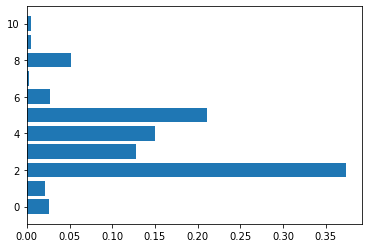

In [90]:
plt.barh(range(len(importance)), importance)
plt.show()

In [91]:
print(confusion_matrix(y_true=y_train, y_pred=y_train_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))

[[3166    0]
 [   0  334]]
[[1346    8]
 [  11  135]]


In [92]:
rf_grid_y_train = rf_grid.predict(x_train)
rf_grid_y_test = rf_grid.predict(x_test)

In [93]:
print(confusion_matrix(y_true=y_train, y_pred=rf_grid_y_train))
print(confusion_matrix(y_true=y_test, y_pred=rf_grid_y_test))

[[3165    1]
 [  27  307]]
[[1349    5]
 [  19  127]]


In [98]:
print(accuracy_score(y_true=y_train, y_pred=rf_grid_y_train))
print(accuracy_score(y_true=y_test, y_pred=rf_grid_y_test))

0.992
0.984


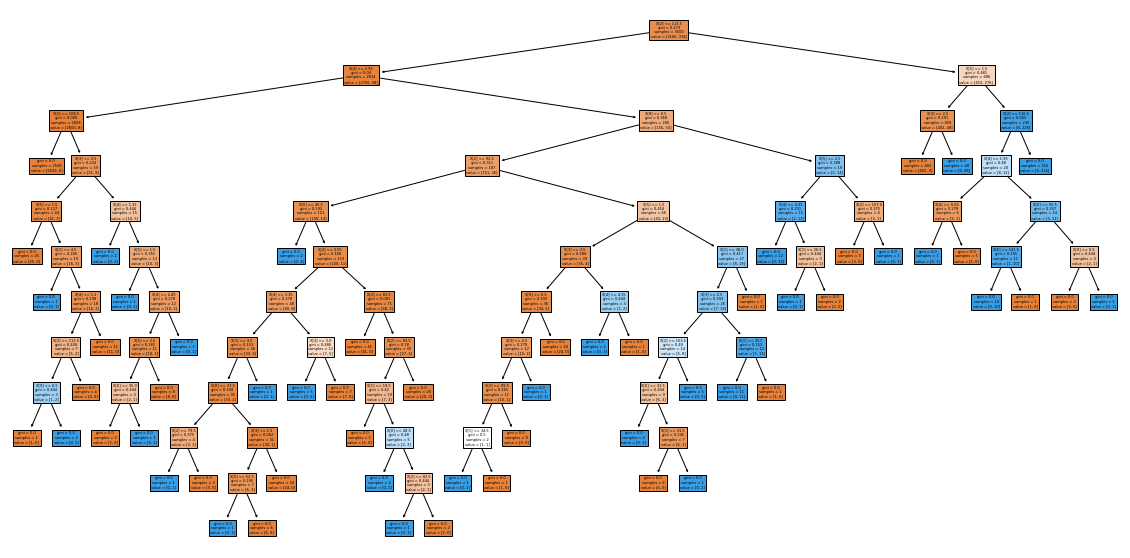

In [96]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True)
plt.show()

Conclusion :
    On an over all random forest and gridsearchcv shows a best model compared to logistic, decision 
    tree and also tree can also be build with important deature